In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from matplotlib.pyplot import figure
import datetime as dt


# Data Loading

In [43]:
df_train=pd.read_csv('ctr_dataset_train.csv')
df_train.head()
df_train=df_train.sample(n=200000)

## Records in the dataset

In [44]:
print(df_train.shape[0])

200000


# Data Exploration


## Checking for null values

In [45]:
print(f" The number of unknown apps is {df_train.app_cat.loc[df_train.app_cat=='unknown'].count()}")

 The number of unknown apps is 47148


In [46]:
df_train.app_cat.replace('unknown', np.nan,inplace=True)
df_train.app_cat.unique()


array([nan, 'games - card', 'games - casino', 'games - sports',
       'games - puzzle', 'education', 'games - board', 'games - casual',
       'games - adventure', 'games - racing', 'entertainment',
       'games - action', 'games - arcade', 'games - role_playing',
       'games - simulation', 'games - strategy', 'games - word',
       'music_and_audio', 'games - trivia', 'games - educational',
       'personalization', 'libraries_and_demo', 'comics',
       'auto_and_vehicles', 'social', 'food_and_drink', 'games - music',
       'tools', 'beauty', 'productivity', 'photography', 'sports',
       'books_and_reference', 'video_players', 'health_and_fitness',
       'lifestyle', 'weather', 'shopping', 'dating', 'news_and_magazines',
       'finance', 'art_and_design', 'business', 'communication', 'events',
       'travel_and_local'], dtype=object)

<AxesSubplot: >

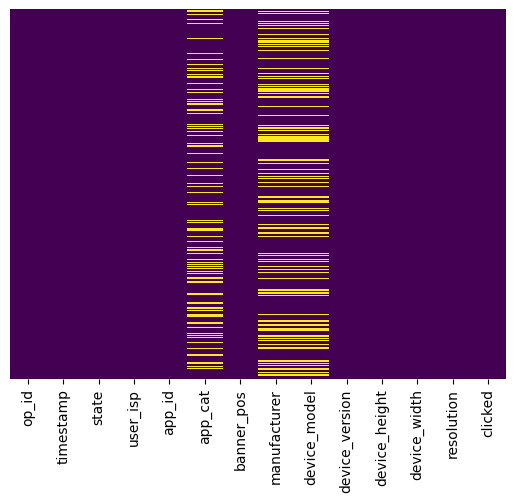

In [47]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
df_train[['device_height','device_width']].describe()

,device_height,device_width
count,200000.000000,200000.000000
mean,1180.999375,1151.704360
std,519.410696,451.937044
min,384.000000,240.000000
25%,720.000000,720.000000
50%,1080.000000,1080.000000
75%,1280.000000,1280.000000
max,3120.000000,3120.000000


## One hot encoding

features = ['state','banner_pos','manufacturer','app_cat']
X = df_train[features]
enc = preprocessing.OneHotEncoder()
enc.fit(X) # fit the encoder to categories in our data 
one_hot = enc.transform(X)
X_proc = pd.DataFrame(one_hot.toarray(), columns=enc.get_feature_names())


In [49]:
df_train.isnull().sum()

op_id                 0
timestamp             0
state                 0
user_isp              5
app_id                0
app_cat           47148
banner_pos            0
manufacturer      61254
device_model      61238
device_version        0
device_height         0
device_width          0
resolution            0
clicked               0
dtype: int64

In [50]:
df_train.nunique()

op_id             200000
timestamp         195316
state                 51
user_isp            1655
app_id              7784
app_cat               45
banner_pos             9
manufacturer         138
device_model        1226
device_version        12
device_height        181
device_width         150
resolution             1
clicked                2
dtype: int64

## Removing undesired columns

#### We can see that the resolution column has only one value, so it won't help the model for further classification

In [51]:
df_train=df_train.drop(columns=['resolution'])


## Correlation between features

C:\Users\liork\AppData\Local\Temp\ipykernel_26392\3782643361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap='coolwarm')


Text(0.5, 1.0, 'new_data correlation')

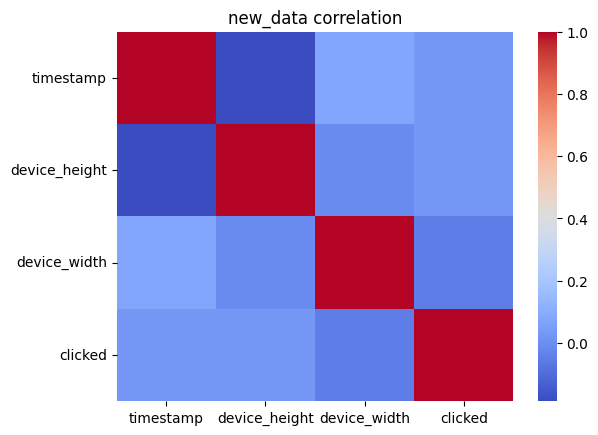

In [52]:
sns.heatmap(df_train.corr(),cmap='coolwarm')
plt.title('new_data correlation')

## Checking for imbalancing

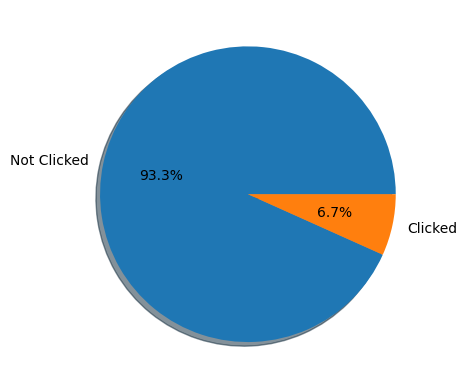

In [53]:
y=df_train.clicked.value_counts()
mylabels = ["Not Clicked","Clicked"]
plt.pie(y, labels = mylabels,autopct='%1.1f%%', shadow = True)
plt.show()

#### We can see that the dataset is not balanced at all, about 93% of the data has a False label

## Creating boxplots per feature

In [54]:
df_train.state.unique()

array(['New York', 'Alabama', 'Florida', 'Georgia', 'Illinois',
       'California', 'Ohio', 'Colorado', 'South Carolina', 'Pennsylvania',
       'Kansas', 'Iowa', 'Arkansas', 'North Carolina', 'Minnesota',
       'Kentucky', 'Texas', 'Virginia', 'Missouri', 'Washington',
       'Louisiana', 'Massachusetts', 'Indiana', 'South Dakota',
       'Michigan', 'Wisconsin', 'Nevada', 'Tennessee', 'Arizona',
       'Maryland', 'Rhode Island', 'North Dakota', 'Oregon',
       'Connecticut', 'Nebraska', 'Oklahoma', 'Idaho',
       'District of Columbia', 'Utah', 'Wyoming', 'New Jersey',
       'Mississippi', 'Maine', 'New Mexico', 'Delaware', 'Montana',
       'New Hampshire', 'Alaska', 'Hawaii', 'Vermont', 'West Virginia'],
      dtype=object)

In [55]:
df_train.app_cat.unique()

array([nan, 'games - card', 'games - casino', 'games - sports',
       'games - puzzle', 'education', 'games - board', 'games - casual',
       'games - adventure', 'games - racing', 'entertainment',
       'games - action', 'games - arcade', 'games - role_playing',
       'games - simulation', 'games - strategy', 'games - word',
       'music_and_audio', 'games - trivia', 'games - educational',
       'personalization', 'libraries_and_demo', 'comics',
       'auto_and_vehicles', 'social', 'food_and_drink', 'games - music',
       'tools', 'beauty', 'productivity', 'photography', 'sports',
       'books_and_reference', 'video_players', 'health_and_fitness',
       'lifestyle', 'weather', 'shopping', 'dating', 'news_and_magazines',
       'finance', 'art_and_design', 'business', 'communication', 'events',
       'travel_and_local'], dtype=object)

In [56]:
df_train['clicked_numeric']=df_train.clicked*1


AxesSubplot(0.125,0.11;0.775x0.77)


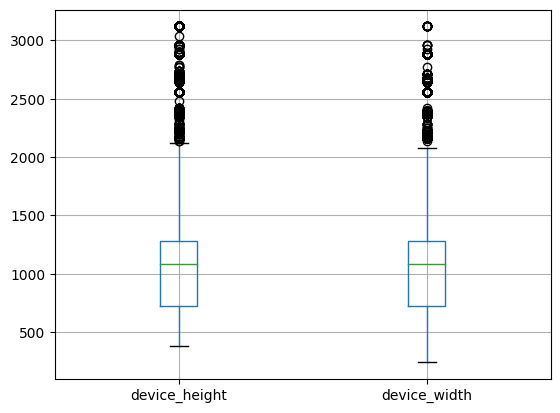

In [57]:
boxplot = df_train.boxplot(column=list(df_train.columns[df_train.dtypes=='int64'][1:]))  
print(boxplot)

In [58]:
table = pd.pivot_table(df_train, values=['clicked_numeric','clicked'], index=['manufacturer', 'device_model'],
                    aggfunc={'clicked_numeric': np.sum, 'clicked':np.size}).sort_values(by=['clicked_numeric'],ascending=False)
table=table.rename(columns={"clicked": "total", "clicked_numeric": "clicked"})
table['ratio clicked']=100*table.clicked/table.total
table

total  clicked  ratio clicked
manufacturer device_model                               
LG           LM-X210(G)     7107      551       7.752920
Motorola     Moto E4        5591      508       9.086031
LG           MP260          4963      494       9.953657
Samsung      SM-J327T1      6651      377       5.668321
LG           MS210          2914      307      10.535347
...                          ...      ...            ...
Lenovo       A7000-a           1        0       0.000000
             A7010a48          3        0       0.000000
             A7020a48          3        0       0.000000
             K3 Note           2        0       0.000000
reeder       P12 Curve         1        0       0.000000

[1226 rows x 3 columns]

In [59]:
df_train.timestamp=df_train.timestamp.apply(dt.datetime.fromtimestamp)


## convert timestamp to day and month columns 

In [60]:
df_train["month"]=df_train.timestamp.apply(lambda x: x.month)
df_train["day"]=df_train.timestamp.apply(lambda x: x.day)
df_train["hour"]=df_train.timestamp.apply(lambda x: x.hour)




### Discretization of the time of day

In [61]:
def return_interval(x):
    if x in np.arange(6,12):
        return 'morning'
    elif x in np.arange(12,18):
        return 'noon'
    else:
        return 'evening'
df_train["interval of day"]=df_train.hour.apply(return_interval)


## The relaitonship between interval of day and No. of clicked ads

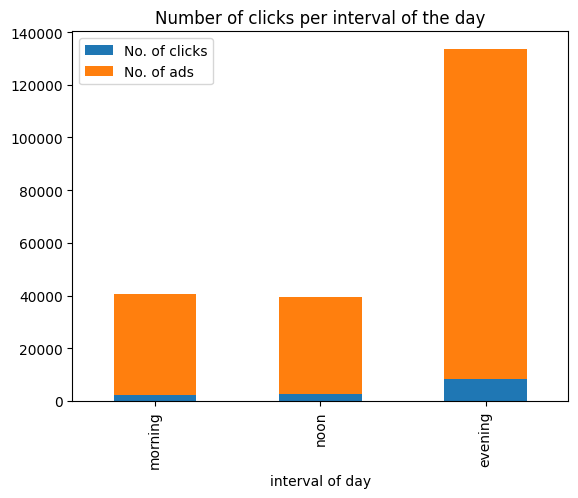

In [62]:
df_clicked_by_month_day=df_train[['clicked_numeric','interval of day']].groupby(by=['interval of day']).agg({'clicked_numeric':['sum','count']})
#print(df_clicked_by_month_day.head())
df_clicked_by_month_day=df_clicked_by_month_day.droplevel(0,axis=1)
interval_order = ["morning", "noon", "evening"]
df_clicked_by_month_day.rename(columns={'sum':'No. of clicks','count':'No. of ads'},inplace=True) 
df_clicked_by_month_day.loc[interval_order].plot.bar(stacked=True)
plt.title("Number of clicks per interval of the day")
plt.show()



#### note: We can clearly see that users tend to click on ads as the day progresses and is effected by the number of adds overall


## Find precent of ads clicked by month

In [63]:
df_train.head()

,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,clicked,clicked_numeric,month,day,hour,interval of day
2436152,d784de49-b25f-45b6-afc4-ec3e78f4eaea,2019-09-30 01:38:43,New York,AT&T Wireless,deg3tft,NaN,bottom-left,NaN,NaN,7.0,854,480,False,0,9,30,1,evening
1558072,f6e93401-ac78-4a4b-aaa5-62de5ba4c27d,2019-08-21 19:07:30,Alabama,AT&T Wireless,74193f6,games - card,bottom-right,NaN,NaN,7.0,1536,864,False,0,8,21,19,evening
622400,bec68e55-2d59-463c-b83d-6ed68f5aa796,2019-09-07 09:15:38,Florida,T-Mobile USA,8278mg1,NaN,right,Samsung,SM-G950U,8.0.0,1080,1920,False,0,9,7,9,morning
2361951,76d6f063-bbd8-45ba-a2c6-78a241e71dc8,2019-10-05 20:07:57,Georgia,AT&T Wireless,aaer5mp,NaN,left,LG,M150,7.0,480,854,False,0,10,5,20,evening
627921,4893bd86-74df-463b-b6d6-b9e21a4d3272,2019-10-21 20:31:52,Illinois,T-Mobile USA,7sroap5,games - casino,top,LG,MP260,7.0,720,1280,False,0,10,21,20,evening


In [64]:
df=df_train[['month','clicked_numeric']].groupby(by=['month']).agg({'clicked_numeric':['sum','count']})
df[('clicked_numeric',   '%clicked')]=np.round(100*df[('clicked_numeric',   'sum')]/df[('clicked_numeric',   'count')],2)
df

clicked_numeric                
                  sum  count %clicked
month                                
7                  38    632     6.01
8                2613  48974     5.34
9                5183  73167     7.08
10               4383  60195     7.28
11               1208  17032     7.09

#### note: We can see that there is a slight increase of ads clicked in the last 3 months

## plot for seasonality of the days in each month

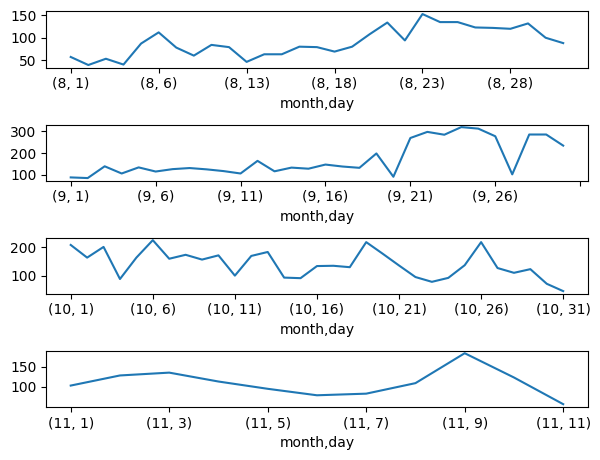

In [65]:
df_clicked_by_month_day=df_train[['day','month','clicked_numeric']].groupby(by=['month','day']).agg({'clicked_numeric':['sum']})
df_list = [df_clicked_by_month_day.loc[(i, slice(None)), :] for i in range(8,12)]
fig, axes = plt.subplots(4)
fig.tight_layout(pad=2.0)
for r in range(4):
    df_list[r].plot(ax=axes[r])
    axes[r].get_legend().remove()



In [66]:
print("done")

done


## Proportion of NULL'S by state


<AxesSubplot: >

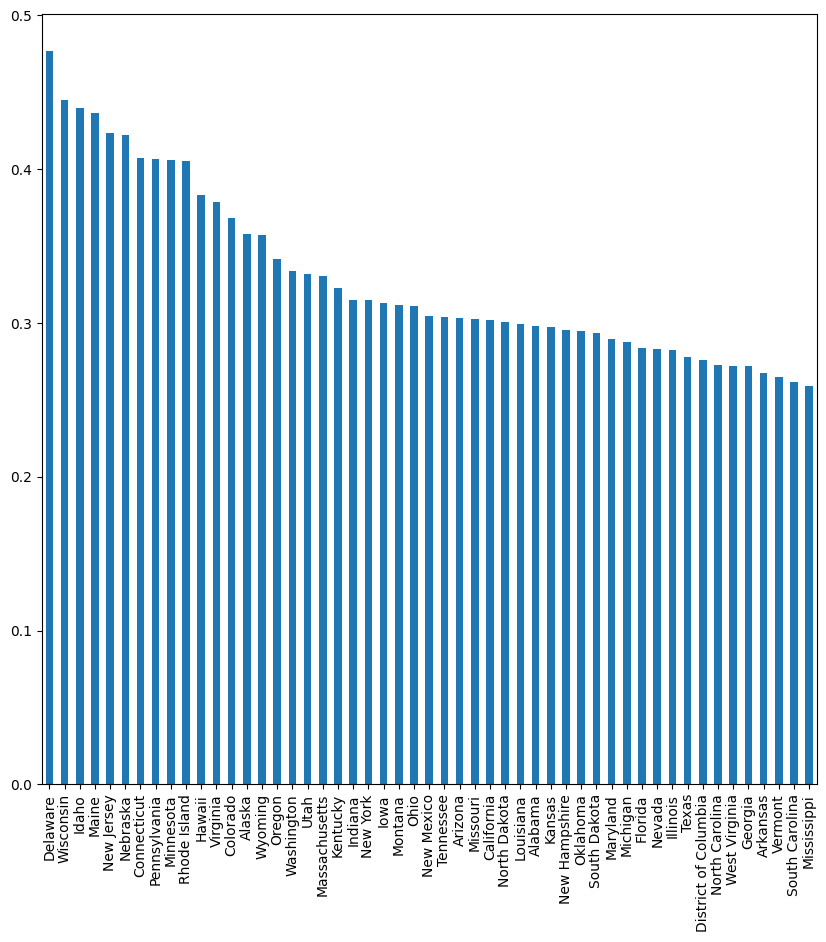

In [67]:
df_diff=(df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].state.value_counts())/df_train.state.value_counts()
df_diff=df_diff.sort_values(ascending=False)
df_diff.plot.bar(figsize=(10,10))


##### Note: <br> Columns with higher height represents states with higher null values proportion, <br> The Data for a combination of device type and device model is not quite missing completely at random, <br> since we can see that the disturbution above is not somewhat uniform for all states, <br> Which means that if we will drop nulls we can prehaps create a bias in our dataset and lose information from many cities <br>

### Check if missibg values are always/mostly missing together

<AxesSubplot: >

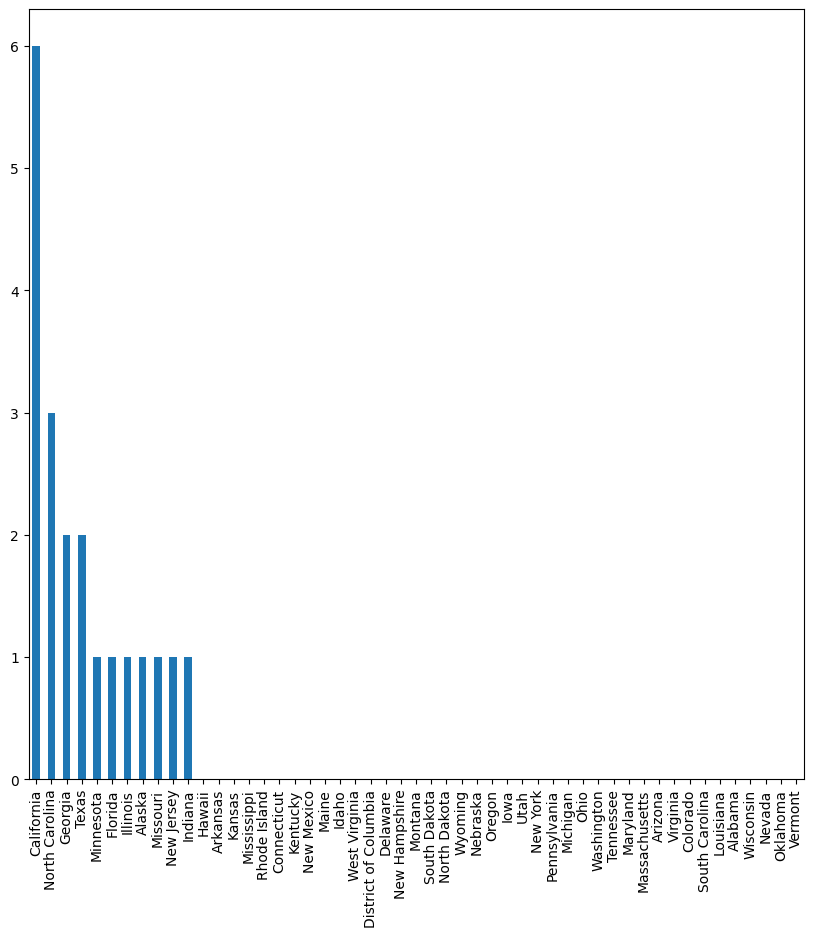

In [68]:
df_diff=df_train[df_train.device_model.isnull() | df_train.manufacturer.isnull()].state.value_counts()-df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].state.value_counts()
df_diff=df_diff.sort_values(ascending=False)
df_diff.plot.bar(figsize=(10,10))



#### Note: We can see that at most cases, they are indeed missing together since the maximum value of the y axis is not larger then 25.

<AxesSubplot: >

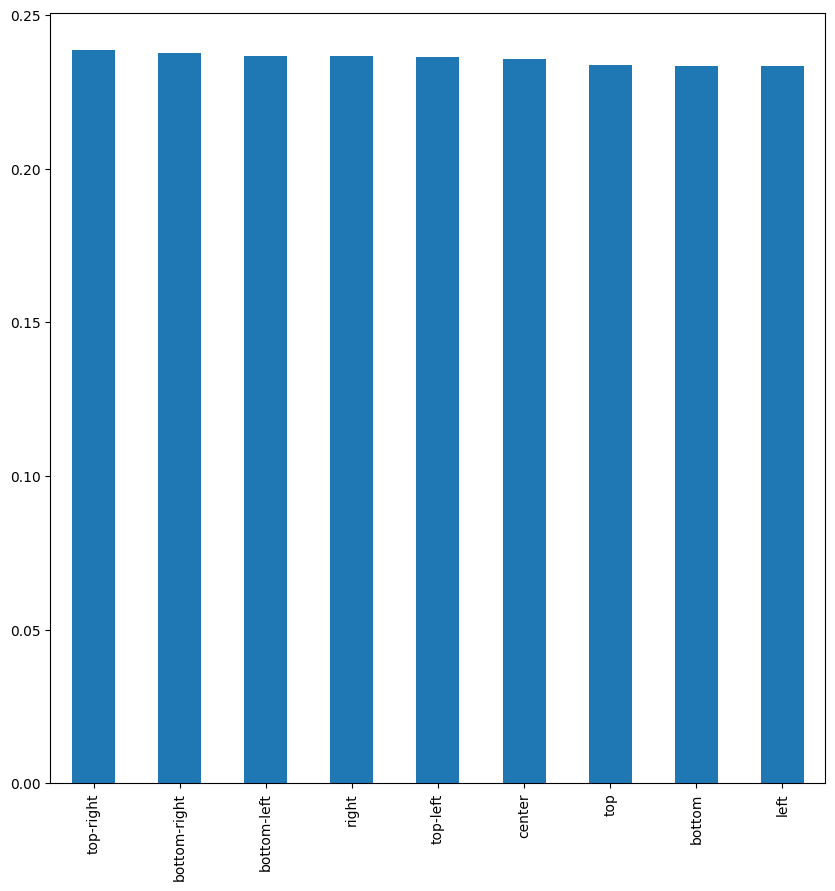

In [69]:
df_diff=df_train[df_train.app_cat.isnull()].banner_pos.value_counts()/df_train.banner_pos.value_counts()
df_diff=df_diff.sort_values(ascending=False)
df_diff.plot.bar(figsize=(10,10))


## West/East Coast partition

In [70]:
ecoast=['New Jersey','Illinois','Georgia','Virginia','New York','Florida',
        'Ohio','Tennessee','Alabama','Massachusetts','Pennsylvania','Washington',
       'North Carolina','Mississippi','Louisiana','Rhode Island','Arizona',
        'Kentucky','Maryland','South Carolina','Connecticut','West Virginia',
        'Vermont','District of Columbia','Delaware','New Hampshire','Maine']
wcoast=['California','Oregon','Hawaii','Colorado','Utah','Nevada','Montana',
        'New Mexico','Wyoming','Idaho','Alaska']
middle=['Minnesota','Texas','Missouri','Oklahoma','Arkansas',
        'Indiana','South Dakota','Wisconsin','Iowa','Kansas','Nebraska','North Dakota']
all_states=set(ecoast).union(set(wcoast))-set(df_train["state"].unique())
if not all_states:
    print("All cities covered")



All cities covered


In [71]:
def city_to_coast(x):
    if x in wcoast:
        return "westcoast"
    elif x in ecoast:
        return "eastcoast"
    else:
        return "middle"

df_train["coast"]=df_train["state"].apply(city_to_coast)

coast
eastcoast    111694
middle        52029
westcoast     36277
Name: clicked_numeric, dtype: int64


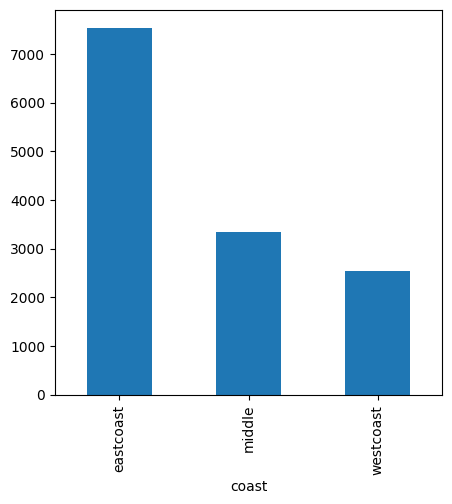

In [72]:
df_clicks_by_coast = df_train.groupby(['coast'])['clicked_numeric'].sum()
df_clicks_by_coast.plot.bar(figsize=(5,5))
df_ads_by_coast = df_train.groupby(['coast'])['clicked_numeric'].count()
print(df_ads_by_coast)

<AxesSubplot: >

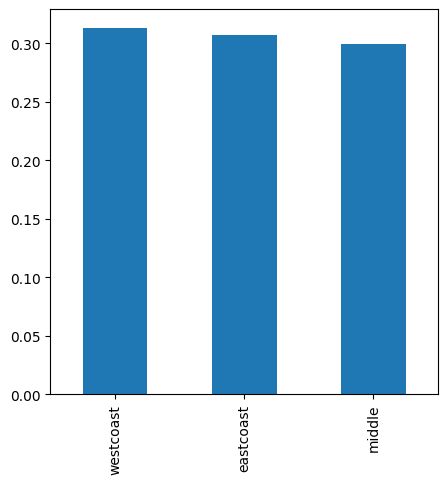

In [73]:
df_diff1=(df_train[df_train.device_model.isnull() & df_train.manufacturer.isnull()].coast.value_counts()/df_train.coast.value_counts()).sort_values(ascending=False)
df_diff1.plot.bar(figsize=(5,5))

#### We can see that the amount of nulls is about the same for each coast in the states

In [74]:
print(f"The number of unique maunfacturers is {df_train.manufacturer.nunique()}")
print(f"The number of unique models is {df_train.device_model.nunique()}")
print(f"The number of unique op_id is {df_train.op_id.nunique()}")


The number of unique maunfacturers is 138
The number of unique models is 1226
The number of unique op_id is 200000


#### Since we have a lot of manufacturers we will drop the op_id and models column

In [75]:
df_train.drop(["device_model","op_id"],inplace=True,axis=1)
df_train.head()

,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_version,device_height,device_width,clicked,clicked_numeric,month,day,hour,interval of day,coast
2436152,2019-09-30 01:38:43,New York,AT&T Wireless,deg3tft,NaN,bottom-left,NaN,7.0,854,480,False,0,9,30,1,evening,eastcoast
1558072,2019-08-21 19:07:30,Alabama,AT&T Wireless,74193f6,games - card,bottom-right,NaN,7.0,1536,864,False,0,8,21,19,evening,eastcoast
622400,2019-09-07 09:15:38,Florida,T-Mobile USA,8278mg1,NaN,right,Samsung,8.0.0,1080,1920,False,0,9,7,9,morning,eastcoast
2361951,2019-10-05 20:07:57,Georgia,AT&T Wireless,aaer5mp,NaN,left,LG,7.0,480,854,False,0,10,5,20,evening,eastcoast
627921,2019-10-21 20:31:52,Illinois,T-Mobile USA,7sroap5,games - casino,top,LG,7.0,720,1280,False,0,10,21,20,evening,eastcoast


In [76]:
def convert_to_float(x):
    if len(x)>3:
        return x[:3]
    else:
        return x[0]
    
df_train.device_version=df_train.device_version.apply(convert_to_float)

## Completing NULL values fo device manufacturer via applying KNN

In [77]:
df_train_manu=df_train[df_train.manufacturer.notnull()]
df_test_manu=df_train[df_train.manufacturer.isnull()]

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train_manu[['device_version','device_height','device_width','clicked_numeric','month','day','hour']], df_train_manu['manufacturer'], test_size=0.33, random_state=42)

In [79]:
from tqdm import tqdm

100%|██████████| 9/9 [00:47<00:00,  5.24s/it]


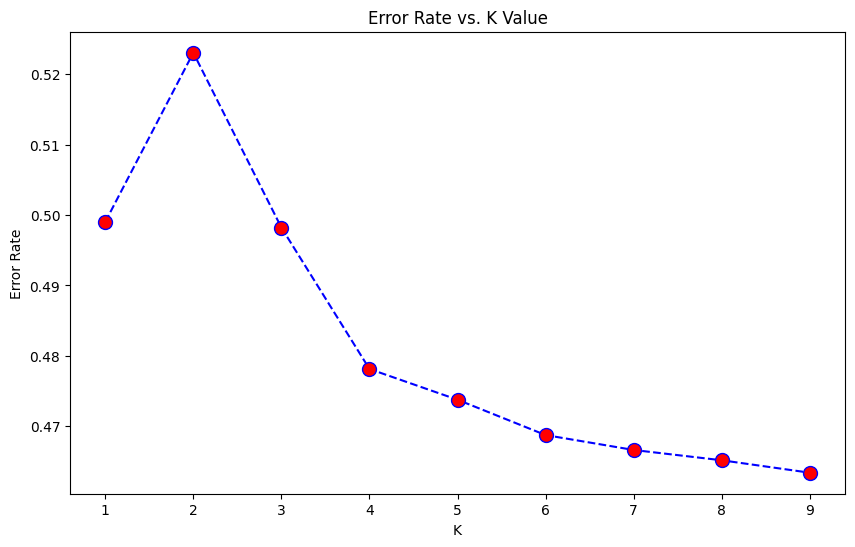

In [80]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in tqdm(range(1,10)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [88]:
print(f"If we will guess the most random category we will be right on {100*df_train.manufacturer.value_counts().iloc[0]/df_train.shape[0]} % of the cases, so KNN is better")

If we will guess the most random category we will be right on 27.3695% of the cases, so KNN is better


In [89]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(df_train_manu[['device_version','device_height','device_width','clicked_numeric','month','day','hour']],df_train_manu['manufacturer'])

KNeighborsClassifier(n_neighbors=6)

In [90]:
df_test_manu.manufacturer=knn.predict(df_test_manu[['device_version','device_height','device_width','clicked_numeric','month','day','hour']])
df_train=pd.concat([df_train_manu,df_test_manu])

C:\Users\liork\AppData\Local\Temp\ipykernel_26392\2318928861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_manu.manufacturer=knn.predict(df_test_manu[['device_version','device_height','device_width','clicked_numeric','month','day','hour']])


In [100]:
df_train.columns

Index(['timestamp', 'state', 'user_isp', 'app_id', 'app_cat', 'banner_pos',
       'manufacturer', 'device_version', 'device_height', 'device_width',
       'clicked', 'clicked_numeric', 'month', 'day', 'hour', 'interval of day',
       'coast'],
      dtype='object')